<a href="https://colab.research.google.com/github/ohunmamajon/Stock-Prediction-Model/blob/main/Tesla_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tesla Stock Price Prediction Model**

---

In [41]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2016-01-01', end='2022-06-16')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001
...,...,...,...,...,...,...
2022-06-10,718.500000,683.739990,705.469971,696.690002,32512200.0,696.690002
2022-06-13,679.900024,644.049988,669.500000,647.210022,34255800.0,647.210022
2022-06-14,678.989990,635.210022,654.859985,662.669983,32662900.0,662.669983


In [44]:
#Get the number of rows and columns in the data set
df.shape

(1626, 6)

<function matplotlib.pyplot.show>

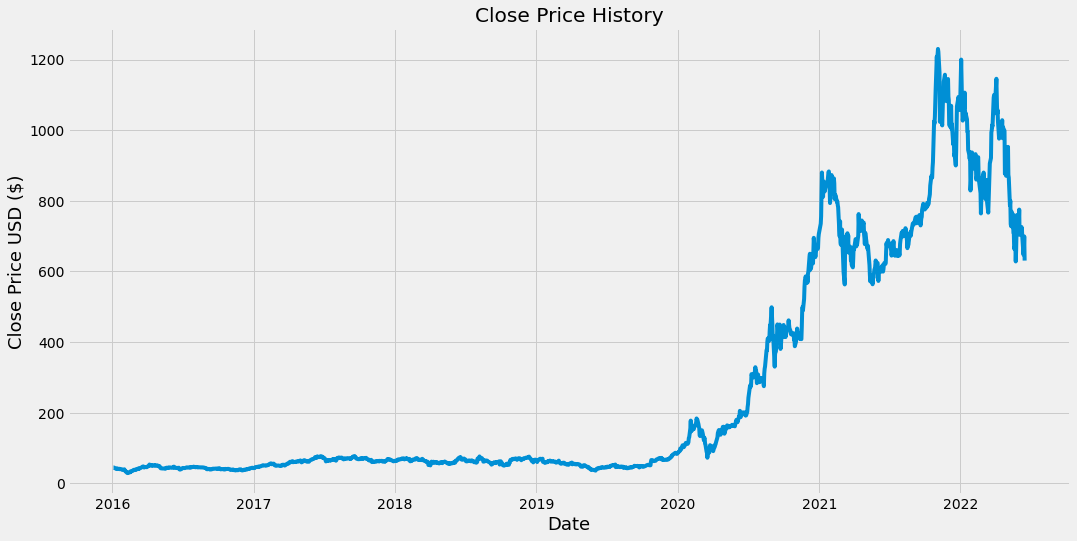

In [45]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show


In [46]:
#Create a new data frame with only 'Close' column
data = df.filter(['Close'])
#Convert the data frame to a numpy array
dataset = data.values 
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len 

1301

In [47]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01327699],
       [0.01328032],
       [0.01254937],
       ...,
       [0.52776276],
       [0.55800814],
       [0.50099736]])

In [48]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01327699, 0.01328032, 0.01254937, 0.01198492, 0.01121068,
       0.01068619, 0.01103918, 0.00943076, 0.01040813, 0.01021   ,
       0.01016504, 0.00916269, 0.00937415, 0.00980372, 0.0087764 ,
       0.00830686, 0.00739275, 0.00766416, 0.00791391, 0.00886964,
       0.00651195, 0.00496347, 0.0052715 , 0.00315191, 0.0007193 ,
       0.00076259, 0.        , 0.00113222, 0.00122713, 0.00191479,
       0.00416425, 0.00384623, 0.0038146 , 0.00567277, 0.00558453,
       0.00588257, 0.00728619, 0.00777072, 0.00803546, 0.00710637,
       0.00743771, 0.00866984, 0.00955231, 0.01025994, 0.00981205,
       0.01083105, 0.01024163, 0.01062792, 0.01190167, 0.01243282,
       0.01303056, 0.0137715 , 0.01483047, 0.01575956, 0.01508022,
       0.01313879, 0.01399961, 0.01441754, 0.01439589, 0.01385642])]
[0.014335949779747097]

[array([0.01327699, 0.01328032, 0.01254937, 0.01198492, 0.01121068,
       0.01068619, 0.01103918, 0.00943076, 0.01040813, 0.01021   ,
       0.01016504, 0.00916269, 0.0

In [49]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [50]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1241, 60, 1)

In [51]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))



In [52]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [53]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1241/1241 [==============================] - 46s 35ms/step - loss: 0.0010


In [55]:
#Create the testing data set
#Create a new array containing scaled data values from index 1181 to 1241
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])             


In [56]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [57]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [59]:
#Evaluate the model by getting the root mean squared error(RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

122.79798117692623

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

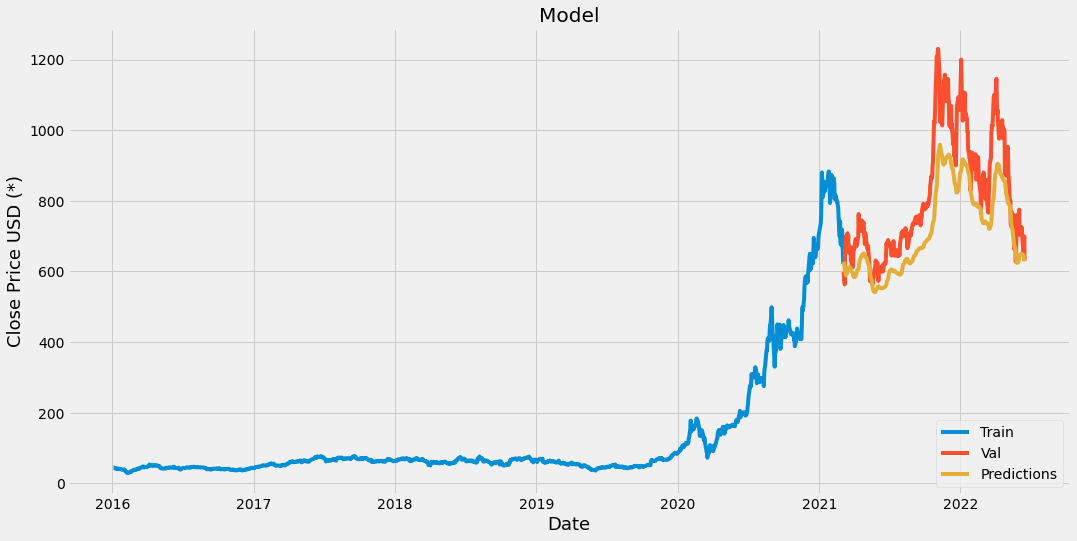

In [60]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD (*)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [61]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-05,597.950012,627.216980
2021-03-08,563.000000,614.296143
2021-03-09,673.580017,598.938110
2021-03-10,668.059998,591.955566
2021-03-11,699.599976,589.543274
...,...,...
2022-06-10,696.690002,648.708740
2022-06-13,647.210022,646.355164
2022-06-14,662.669983,639.670898


In [64]:
#Get the quote
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2016-01-01', end='2022-06-16')
#Create a new data frame
new_df = tesla_quote.filter(['Close'])
#Get the last 60-day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values 
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print (pred_price)

[[621.3512]]
